##Установки библиотек
тут установки и для краулинга, и те, которые потом пригодятся

In [ ]:
pip install fake_useragent

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install pandas spacy scikit-learn


In [ ]:
!pip install stanza spacy textblob yake natasha keybert dostoevsky langdetect autocorrect -q
!python -m spacy download ru_core_news_sm -q
!python -m textblob.download_corpora -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
  

In [ ]:
!python -m spacy download ru_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 14.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import ast

In [ ]:
import time
from pprint import pprint
import random
from tqdm.auto import tqdm
import pandas as pd
from datetime import datetime
import re

In [ ]:
import requests
from fake_useragent import UserAgent
import requests
from bs4 import BeautifulSoup

In [ ]:
import json
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import string


In [ ]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nlp = spacy.load("ru_core_news_md")

In [ ]:
!python -m spacy download ru_core_news_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.8.0/ru_core_news_sm-3.8.0-py3-none-any.whl (15.3 MB)
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import json


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sqlite3

#Краулинг

##Сам краулинг новостей

Изначально, моя идея заключалась в том, что я посмотрю на три разных "сообщества" = источника.

Но, после того, как я потратила день на краулинг peopletalk и поняла, что на 500 страниц с новостями мне попалось 3 новости с тэгом "художественная гимнастика", я решила, что вместо трех источников у меня будет только два. Поэтому эту часть с peopletalk лучше не запускать по нескольким причинам
1) два блока суммарно работают 5-6 часов
2) выкачается +- 3 новости.

Но оба кода рабочие, я их резы сохранила и прикрепила на гитхаб, но в дальнейшем проекте я ими не пользуюсь, потому что 3 новости - нерепрезентативны ((

###Peopletalk

Когда я обкачивала, первая новость про гимнастику была на 59 странице, поэтому я проверяла по ней рабочесть кода

Сcылка на медиа:
https://peopletalk.ru/category/news/

В чем заключалась моя ошибка:
Я почему-то думала, что последние 500 страниц новостей обхватят период +- до начала декабря прошлого года, за это время произошли события, которые точно в этом медиа освещались
- Чемпионат России по художественной гимнастике
- Отставка Винер и скандал с Кабаевой по этому поводу (я была уверена, что про это будет новостей 5, как минимум, потому что в других каналах вышло не одно расследование, но, видимо, не тут...)
- Ледниковый период, в которым приняли участие сестры Аверины
- Дине Авериной сделали предложение

Но, как оказалось, 500 страниц охватили слишком маленький период, а про гимнастику пишут не так и много, как я думала, даже не смотря на то, что гимнастика в последнее время привлекает всеобщее внимание

In [ ]:
random.uniform(1, 3)
session = requests.session()
ua = UserAgent()
headers = {'User-Agent': ua.random}
for _ in range(5):
    response = session.get('https://peopletalk.ru/category/news/page/59/', headers=headers)
    print(datetime.now())
    time.sleep(random.uniform(1.1, 5.2))


page = response.text
soup = BeautifulSoup(page, 'html.parser')

2025-03-21 18:17:38.571842
2025-03-21 18:17:43.596242
2025-03-21 18:17:47.626000
2025-03-21 18:17:49.348596
2025-03-21 18:17:54.718826


In [ ]:
def get_full_article_text(article_url):
    response = requests.get(article_url, headers={'User-Agent': 'Mozilla/5.0'})
    article_page = response.text
    article_soup = BeautifulSoup(article_page, 'html.parser')

    full_text = ''

    content_div = article_soup.find('div', class_='row justify-content-center mb-5')
    if content_div:
        paragraphs = content_div.find_all('p')
        full_text = '\n'.join([p.text for p in paragraphs])

    tags = []
    tag_elements = article_soup.find_all('a', class_='btn btn-secondary btn-secondary-gray font-weight-normal site__tags-item p-2')
    for tag in tag_elements:
        tags.append(tag.text.strip())

    return full_text.strip(), tags

In [ ]:
page = response.text
articles = soup.find_all('div', class_='article article__md article-md')
print(articles)
def parse_news_page_block(one_block):
    block = {}
    a = one_block.find('a')
    block['href'] = a.attrs['href']
    title_div = one_block.find('div', {'class': 'h3 article-title font-weight-normal'})  #  Заголовок
    if title_div:
        title = title_div.text.strip()
        block['title'] = title
    else:
        block['title'] = 'Заголовок не найден'


    full_text, tags = get_full_article_text(block['href'])
    block['full_text'] = full_text
    block['tags'] = tags
    if "художественная гимнастика" in [tag.lower() for tag in tags]: # Проверяем, есть ли нужный тег среди тегов статьи (без учета регистра)
      return block
    else:
      return None


[<div class="article article__md article-md">
<div class="article-image mb-2">
<div class="type-content">
<i class="icon-type icon-"></i>
</div>
<a href="https://peopletalk.ru/article/blejk-lajvli-obvinila-izvestnyj-zhurnal-iz-za-oblozhki-s-dzhastinom-baldoni/">
<div class="grid-item__figure article-item__image-block">
<img alt="Блейк Лайвли обвинила известный журнал из-за обложки с Джастином Бальдони" class="lazy__img" data-sizes="(max-width: 560px) 100vw, 560px" data-src="https://st.peopletalk.ru/wp-content/uploads/2025/02/b2dff0015acf47132c711e773721941a-scaled-560x470.jpg" data-srcset="https://st.peopletalk.ru/wp-content/uploads/2025/02/b2dff0015acf47132c711e773721941a-scaled-300x227.jpg 300w, https://st.peopletalk.ru/wp-content/uploads/2025/02/b2dff0015acf47132c711e773721941a-scaled-1024x773.jpg 1024w, https://st.peopletalk.ru/wp-content/uploads/2025/02/b2dff0015acf47132c711e773721941a-scaled-768x580.jpg 768w, https://st.peopletalk.ru/wp-content/uploads/2025/02/b2dff0015acf47132c7

In [ ]:
news_data = []
for article in articles:
    news_item = parse_news_page_block(article)
    news_data.append(news_item)

pprint(news_data)

[None,
 None,
 None,
 None,
 {'full_text': 'В этом месяце 76-летняя Ирина Винер ушла в отставку с поста '
               'главного тренера сборной России по художественной гимнастике. '
               'Она занимала эту должность с 2001 года. Как сообщила '
               'пресс-служба министерства спорта РФ, на этом посту ее заменит '
               'Татьяна Сергаева.\n'
               '«Татьяна Сергаева — опытный тренер, она посвятила всю свою '
               'жизнь художественной гимнастике. И я уверен, что она приложит '
               'все свои знания и профессиональный опыт, чтобы наши '
               'спортсменки сохраняли лидирующие позиции и приносили России '
               'новые победы», — сказал президент Федерации гимнастики России '
               'Олег Белозеров.\n'
               'Сергаева — мастер спорта СССР, в 1997 году ей было присвоено '
               'звание заслуженного тренера России. В течение 17 лет она была '
               'старшим тренером сборной России

In [ ]:
def get_nth_page(page_number):  # ищем все "основные" новости на 500 страницах
    url = f'https://peopletalk.ru/category/news/page/{page_number}/'
    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')

    articles = soup.find_all('div', class_='article article__md article-md')

    news_data = []
    for article in articles:
        try:
            news_item = parse_news_page_block(article)
            news_data.append(news_item)
        except Exception as e:
            print(e)

    return news_data

def run_all(n_pages):
    all_news_data = []
    for i in tqdm(range(n_pages)):
        all_news_data.extend(get_nth_page(i + 1))

    return all_news_data

news_blocks = run_all(500)

df_news = pd.DataFrame(news_blocks)

print(df_news)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
df_news.to_csv('output.csv')


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
dtypes: object(1)
memory usage: 117.3+ KB


In [ ]:
page = response.text
articles_big = soup.find_all('div', class_='article article__md article-lg article__accent')
# print(articles)
def parse_news_page_block_big(one_block):
    block = {}
    a = one_block.find('a')
    block['href'] = a.attrs['href']
    title_div = one_block.find('div', {'class': 'h3 article-title font-weight-normal'})  #  Заголовок
    if title_div:
        title = title_div.text.strip()
        block['title'] = title
    else:
        block['title'] = 'Заголовок не найден'  # проверяю на всякий случай

    pub_day_div = one_block.find('a', {'class': 'article-date text-xs text-lowercase'})
    if pub_day_div:
        block['pub_day'] = pub_day_div.text.strip()
    else:
        block['pub_day'] = 'Дата не найдена'

    full_text, tags = get_full_article_text(block['href'])
    block['full_text'] = full_text
    block['tags'] = tags

    return block


news_data_big = []
for article in articles_big:
    news_item = parse_news_page_block_big(article)
    news_data_big.append(news_item)

pprint(news_data_big)

[{'full_text': 'Любители киновселенной Marvel, ликуйте, скорее всего вас ждет '
               'продолжение любимых сериалов. Об этом пишет Entertainment '
               'Weekly со ссылкой на главу отдела стриминга Брэда '
               'Уиндербаума.\n'
               '«Я думаю, что у него есть потенциал для линейного сериала. '
               'Такое шоу, как «Это все Агата», на мой взгляд, основано на '
               'концепции. Да, второй сезон — это то, что мы точно хотели бы '
               'снять, но давайте не будем торопиться. Давайте придумаем '
               'правильную идею, а потом воплотим ее в жизнь, — сказал он '
               'изданию о продолжении одного из шоу.\n'
               'Брэд продолжил: «Соколиный глаз» — еще один сериал, для '
               'которого, кажется, можно было бы снять второй сезон. <…> По '
               'мере того, как мы разрабатываем проекты на будущее, я думаю, '
               'что они будут рассчитаны на несколько сезонов, будут имет

In [ ]:
articles_small = soup.find_all('div', class_='article article__xs col-12 mb-3')

def parse_news_page_block_small(one_block):
    block = {}
    a = one_block.find('a', class_='article-image')
    block['href'] = a.attrs['href']

    title_div = one_block.find('div', {'class': 'h6 article-title mb-0 font-weight-medium font-body'})  # Заголовок
    if title_div:
        title = title_div.text.strip()
        block['title'] = title
    else:
        block['title'] = 'Заголовок не найден'

    full_text, tags = get_full_article_text(block['href'])
    block['full_text'] = full_text
    block['tags'] = tags
    if "художественная гимнастика" in [tag.lower() for tag in tags]: # Проверяем, есть ли нужный тег среди тегов статьи (без учета регистра)
      return block
    else:
      return None

news_data_2 = []
for article in articles_small:
    news_item = parse_news_page_block_small(article)
    news_data_2.append(news_item)


pprint(news_data_2)

[None, None, None, None, None]


In [ ]:
def get_nth_page_small(page_number):   # ищем все "маленькие" новости на 500 страницах
    url = f'https://peopletalk.ru/category/news/page/{page_number}/'
    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')
    articles = soup.find_all('div', class_='article article__xs col-12 mb-3')

    news_data = []
    for article in articles:
        try:
            news_item = parse_news_page_block_small(article)
            news_data.append(news_item)
        except Exception as e:
            print(e)

    return news_data


def run_all_small(n_pages):
    all_news_data = []
    for i in tqdm(range(n_pages)):
        all_news_data.extend(get_nth_page_small(i + 1))

    return all_news_data


news_blocks_small = run_all_small(500)

df_news_small = pd.DataFrame(news_blocks_small)

print(df_news_small)



  0%|          | 0/500 [00:00<?, ?it/s]

         0
0     None
1     None
2     None
3     None
4     None
...    ...
2495  None
2496  None
2497  None
2498  None
2499  None

[2500 rows x 1 columns]


In [ ]:
df_news_small.to_csv('output_small.csv')

### Всероссийская федерация художественной гимнастики

Тут я краулю новости с официального сайта федерации художественной гимнастики РФ

Ссылка на сайт:
https://vfrg.ru/about/news/

В целом, проблем тут не было, скачала 4000 новостей (чтобы была хорошая выборка, а потом удалила пустые новости, напрмиер, как эта https://vfrg.ru/about/news/OpublikovanyspiskisbornoykomandyRossiina2025god/ )

In [ ]:
random.uniform(1, 3)
session = requests.session()
ua = UserAgent()
headers = {'User-Agent': ua.random}
for _ in range(5):
    response = session.get('https://vfrg.ru/about/news/', headers=headers)
    print(datetime.now())
    time.sleep(random.uniform(1.1, 5.2))


page = response.text
soup = BeautifulSoup(page, 'html.parser')

2025-03-22 23:00:40.181105
2025-03-22 23:00:43.718372
2025-03-22 23:00:47.176314
2025-03-22 23:00:50.787222
2025-03-22 23:00:56.176326


In [ ]:
BASE_URL = 'https://vfrg.ru'
def get_full_article_text(article_url):
    full_article_url = BASE_URL + article_url
    #print(full_article_url)
    response = requests.get(full_article_url, headers={'User-Agent': ua.random})

    # Проверка на успешный ответ
    if response.status_code != 200: # тут была какая-то проблема с этим 'User-Agent': ua.random, но вроде, когда я сделала рандомного юзера, ошибка исчезла
        print(f"Ошибка при получении страницы: {response.status_code}")
        return ""


    article_page = response.text
    article_soup = BeautifulSoup(article_page, 'html.parser')
    news_section = article_soup.find('section', class_='news')

    full_text = ''
    if news_section:
        paragraphs = news_section.find_all('p')
        full_text = '\n\n'.join([p.text for p in paragraphs])   # Извлекаем текст из параграфов

    return full_text.strip()

# Пример использования
# article_url = "https://vfrg.ru/about/news/rossiyskiegimnastkinesmogutvystupitnachempionatemira2025godavBrazilii/"
# full_text = get_full_article_text(article_url)
# print(full_text)

In [ ]:
news_list_container = soup.find('div', class_='list')

def parse_news_item_small(news_item):
    block = {}
    a_tag = news_item.find('a')
    if a_tag and 'href' in a_tag.attrs:
        block['href'] = a_tag.attrs['href']
        title = a_tag.get_text(strip=True)
        block['title'] = title
        full_text = get_full_article_text(block['href'])
        block['full_text'] = full_text
    else:
        block['href'] = 'Ссылка не найдена'
        block['title'] = 'Заголовок не найден'
        block['full_text'] = 'Текст не найден из-за ошибки ссылки'
    return block


In [ ]:
news_data_2 = []
if news_list_container:
    news_items = news_list_container.find_all('article', class_='nophoto')
    for news_item in news_items: # Итерируемся по найденным article
        news_block = parse_news_item_small(news_item)
        news_data_2.append(news_block)

In [ ]:
pprint(news_data_2)

[{'full_text': '27 января — День полного освобождения Ленинграда от блокады\r\n'
               '\n'
               '\r\n'
               '\t Сегодня мы вспоминаем героическое событие — окончательное '
               'освобождение Ленинграда от блокады в 1944 году. 872 дня '
               'мужества, стойкости и единства стали символом несгибаемой силы '
               'духа нашего народа.\r\n'
               '\n'
               '\r\n'
               '\t Ленинград выстоял в тяжелейших испытаниях. Город выжил. '
               'Именно здесь в 1934 году была открыта первая Высшая школа '
               'художественного движения, положившая начало художественной '
               'гимнастике, а город стал родиной этого прекрасного вида '
               'спорта.\r\n'
               '\n'
               '\r\n'
               '\t В год 80-летия Великой Победы мы чтим память всех, кто '
               'отстоял Ленинград и приблизил свободу и мир. Их подвиг '
               'навсегда останется в

In [ ]:
def get_nth_page_gym(page_number):  # ищем все "основные" новости на странице page_number
    url = f'https://vfrg.ru/about/news/?PAGEN_1={page_number}'
    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')

    articles_lists = soup.find_all('div', class_='list') #находим все
    news_data_2 = []
    if articles_lists:
        for article_list in articles_lists:
            news_items = article_list.find_all('article', class_='nophoto') # Ищем article.nophoto внутри каждого list
            for news_item in news_items: # Перебираем найденные article.nophoto
                news_block = parse_news_item_small(news_item)
                news_data_2.append(news_block)
    return news_data_2

def run_all(n_pages):
    all_news_data = []
    for i in tqdm(range(n_pages)):
        page_news = get_nth_page_gym(i + 1) # Получаем новости с каждой страницы
        if page_news: # Проверяем, что новости были получены со страницы
            all_news_data.extend(page_news)
        else:
            print(f"Не удалось получить новости со страницы {i + 1}")

    return all_news_data

news_blocks = run_all(200)
print(f"Всего собрано новостных блоков: {len(news_blocks)}")


  0%|          | 0/200 [00:00<?, ?it/s]

Всего собрано новостных блоков: 3987


Тут я столкнулась с проблемой, что у меня не скачивалось 200 разных страниц с новостями, а скачивалось 200 раз одна и та же первая старница, поэтому пришлось понатыкать разных проверок по ходу кода

In [ ]:
df_news = pd.DataFrame(news_blocks)

print(df_news)

                                                   href  \
0     /about/news/27yanvaryaDenpolnogoosvobozhdeniya...   
1     /about/news/Polozhenieomezhregionalnykhivseros...   
2     /about/news/OpublikovanyspiskisbornoykomandyRo...   
3                    /about/news/Podvodyaitogi2024goda/   
4     /about/news/Etotgodbylosobennymvedmyotmetili90...   
...                                                 ...   
3982      /about/news/UAEVictoryChallengeCupvDubae2024/   
3983     /about/news/Irina-Viner-na-Lednikovom-periode/   
3984       /about/news/StartovalUAEVictoryChallengeCup/   
3985  /about/news/MilenaSHCHenyatskaya-pyat_zolotykh...   
3986                           /about/news/SDnemMateri/   

                                                  title  \
0     27 января — День полного освобождения Ленингра...   
1     Положение о межрегиональных и всероссийских оф...   
2     Опубликованы списки сборной команды России на ...   
3                               Подводя итоги 2024 года

In [ ]:
df_news.head()

,href,title,full_text
0,/about/news/27yanvaryaDenpolnogoosvobozhdeniya...,27 января — День полного освобождения Ленингра...,27 января — День полного освобождения Ленингра...
1,/about/news/Polozhenieomezhregionalnykhivseros...,Положение о межрегиональных и всероссийских оф...,На сайте опубликовано Положение о межрегиональ...
2,/about/news/OpublikovanyspiskisbornoykomandyRo...,Опубликованы списки сборной команды России на ...,
3,/about/news/Podvodyaitogi2024goda/,Подводя итоги 2024 года,Дорогие друзья! \r\n\n\r\n\tПодводя итоги этог...
4,/about/news/Etotgodbylosobennymvedmyotmetili90...,"Этот год был особенным, ведь мы отметили 90-ле...",Дорогие поклонники художественной гимнастики! ...


In [ ]:
df_news['source'] = 'vfrg'  # добавляю источник для дальнейшей базы данных

In [ ]:
df_filtered = df_news[df_news['full_text'].str.strip() != '']
# отчистка от тех самых пустых новостей, пример привела выше

In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       3987 non-null   object
 1   title      3987 non-null   object
 2   full_text  3987 non-null   object
 3   source     3987 non-null   object
dtypes: object(4)
memory usage: 124.7+ KB


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3657 entries, 0 to 3986
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       3657 non-null   object
 1   title      3657 non-null   object
 2   full_text  3657 non-null   object
 3   source     3657 non-null   object
dtypes: object(4)
memory usage: 142.9+ KB


In [ ]:
df_filtered.to_csv('fff_before_prep.csv')

# NLP инструменты

В этом разделе я обрабатываю свои новости.
Общий алгоритм:
1. Сначала лемматизирую и чищу тексты статей от мусора
2. В каждой статье выделяю людей (именнованные сущности persons)
3. В каждой статье при помощи TF-IDF выделяю топ 3 ключевых слов в статье

###Обработка датафрейма

In [69]:
df_filtered = pd.read_csv('fff_before_prep.csv')

In [58]:
def is_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))
# я немного продолбалась и тут проверяю, что всё, что попало в ключевые слова - это русские слова, чтобы избежать 'title' и т.п

In [71]:
def preprocess(text):
    text = re.sub(r'[^а-яА-Я\s.,!?"\'-]', ' ', text)  # Удаляем все, кроме кириллицы, пробелов и знаков препинания

    doc = nlp(text)
    cleaned_sent = ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_stop and token.is_alpha)

    return cleaned_sent.strip()


df_filtered['processed_text'] = df_filtered['full_text'].apply(preprocess)

In [72]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3657 non-null   int64 
 1   href            3657 non-null   object
 2   title           3657 non-null   object
 3   full_text       3657 non-null   object
 4   source          3657 non-null   object
 5   processed_text  3657 non-null   object
dtypes: int64(1), object(5)
memory usage: 171.6+ KB


In [73]:
def process_news_from_dataframe(df):

    # Извлечкаем именованные сущности (только люди). Если человек упоминается несколько раз в новости, то он добавляется 1 раз
    def extract_person_entities(text):
      doc = nlp(text)
      person_names = []
      seen_names = set()
      for ent in doc.ents:
        if ent.label_ == "PER":
          lemma_name = ' '.join([token.lemma_ for token in ent])
          if lemma_name not in seen_names:
            person_names.append(lemma_name)
            seen_names.add(lemma_name)
      return person_names
    df['persons'] = df['full_text'].apply(extract_person_entities) # Применяем к 'full_text'

    # TF-IDF векторизация и извлечение топ-3 ключевых слов
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

    def get_top_keywords(row_index, tfidf_matrix, vectorizer, top_n=3):
        row = tfidf_matrix[row_index]
        feature_array = vectorizer.get_feature_names_out()
        tfidf_sorting = row.toarray().flatten().argsort()[::-1]

        top_keywords_list = []
        for idx in tfidf_sorting[:top_n]:
            top_keywords_list.append(feature_array[idx])
        return top_keywords_list

    keywords_list = []
    for i in range(len(df)):
        keywords = get_top_keywords(i, tfidf_matrix, vectorizer)
        keywords_list.append(keywords)

    df['keywords'] = keywords_list

    return df

In [74]:
df_processed_df = process_news_from_dataframe(df_filtered.copy())

In [75]:
df_processed_df.info()
df_processed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3657 non-null   int64 
 1   href            3657 non-null   object
 2   title           3657 non-null   object
 3   full_text       3657 non-null   object
 4   source          3657 non-null   object
 5   processed_text  3657 non-null   object
 6   persons         3657 non-null   object
 7   keywords        3657 non-null   object
dtypes: int64(1), object(7)
memory usage: 228.7+ KB


,Unnamed: 0,href,title,full_text,source,processed_text,persons,keywords
0,0,/about/news/27yanvaryaDenpolnogoosvobozhdeniya...,27 января — День полного освобождения Ленингра...,27 января — День полного освобождения Ленингра...,vfrg,январь день полный освобождение ленинград блок...,[],"[ленинград, освобождение, блокада]"
1,1,/about/news/Polozhenieomezhregionalnykhivseros...,Положение о межрегиональных и всероссийских оф...,На сайте опубликовано Положение о межрегиональ...,vfrg,сайт опубликовать положение межрегиональный вс...,[],"[межрегиональный, опубликовать, положение]"
2,3,/about/news/Podvodyaitogi2024goda/,Подводя итоги 2024 года,Дорогие друзья! \r\n\n\r\n\tПодводя итоги этог...,vfrg,дорогой друг подводить итог насыщенный год под...,[],"[победа, самоотдача, пережить]"
3,4,/about/news/Etotgodbylosobennymvedmyotmetili90...,"Этот год был особенным, ведь мы отметили 90-ле...",Дорогие поклонники художественной гимнастики! ...,vfrg,дорогой поклонник художественный гимнастика го...,[],"[история, музыкант, незабываемый]"
4,5,/about/news/Finalnyesbory2024godaPerspektivnye...,Финальные сборы 2024 года - «Перспективные дети»,В Новогорске полным ходом идут финальные сборы...,vfrg,новогорск полный ход идти финальный сбор персп...,"[марина николаев, вероника шатковой, дмитрий с...","[марина, сбор, царевой]"


###Обработка json

У меня был json файл, который мне помогла скачать Катя из телеграмм канала про гимнастику. В нем чересчур много маленьких новостей, просто новостей и рекламы, поэтому тут обработка побольше.

In [76]:
def get_full_text(text_data): # из-за немного странного устройства некоторых статей я сделала отдельную функцию, которая объединяет разные типы данных в один текст

    if isinstance(text_data, str):
        return text_data
    elif isinstance(text_data, list):
        return ' '.join([str(item) for item in text_data])
    return ""


In [77]:
def process_news_from_json(json_file_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути: {json_file_path}")
        return pd.DataFrame()
    except json.JSONDecodeError:
        print(f"Ошибка: Не удалось декодировать JSON из файла: {json_file_path}.")
        return pd.DataFrame()

    messages = data['messages']
    df = pd.DataFrame(messages)

    #  Удаление новостей с текстом менее 50 слов или без текста
    df['word_count'] = df['text'].apply(lambda text: len(get_full_text(text).split()))
    df_filtered = df[df['word_count'] >= 50]

    # Удаление новостей 2020-2022 годов (чтобы можно было сравнить со скаченными новостями с сайта федерации ХГ)
    def get_year(date_str):
        try:
            return int(date_str[:4])
        except:
            return None

    df_filtered['year'] = df_filtered['date'].apply(get_year)
    df_filtered = df_filtered[~df_filtered['year'].isin([2020, 2021, 2022])]

    # Удаление новостей со словом 'реклама'
    df_filtered = df_filtered[~df_filtered['text'].apply(lambda text: 'реклама' in get_full_text(text).lower())]

    def remove_emojis(text): # нашла в интернете мега способ, как удалить смайлики из текста, но он не сработал((
        # но идея была отчистить текст от смайлов (это же всё таки новости из телеграмм канала)
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    df_filtered['text'] = df_filtered['text'].apply(lambda text: remove_emojis(get_full_text(text)))

    # Обрезаю всё до 3800 последних новостей, чтобы можно было сравнивать с данными с сайта федерации
    # с сайта получилось чуть меньше новостей, но я предполагаю, что они там в среднем немного длиннее, поэтому тут оставлено намеренно немного больше
    df_filtered['datetime'] = pd.to_datetime(df_filtered['date'])
    df_filtered = df_filtered.sort_values(by='datetime', ascending=False).head(3800)

    df_filtered['full_text'] = df_filtered['text'].apply(preprocess)

    # подготовка к извлечению ключевыз слов (простая пробработка текста (лемматизация и т.д))
    # когда делала, забыла, что такое же уже есть для датафрейма
    def extract_keywords(text):
      text = re.sub(r'[^а-яА-Я\s.,!?"\'-]', ' ', text)  # Удаляем все, кроме кириллицы, пробелов и знаков препинания
      doc = nlp(text)
      tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
      return " ".join(tokens)

    df_filtered['processed_text_for_keywords'] = df_filtered['full_text'].apply(extract_keywords)

    # извлечение именованных сущностей
    def extract_person_entities(text):
      text = re.sub(r'[^а-яА-Я\s.,!?"\'-]', ' ', text) # Удаляем все, кроме кириллицы, пробелов и знаков препинания
      doc = nlp(text)
      person_names = []
      seen_names = set()
      for ent in doc.ents:
          if ent.label_ == "PER":
              lemma_name = ' '.join([token.lemma_ for token in ent])
              if lemma_name not in seen_names:
                  person_names.append(lemma_name)
                  seen_names.add(lemma_name)
      return person_names

    df_filtered['persons'] = df_filtered['full_text'].apply(extract_person_entities) # Строка, вызывающая ошибку


    # извлечение топ 3 ключевых слов
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df_filtered['processed_text_for_keywords'])

    def get_top_keywords(row_index, tfidf_matrix, vectorizer, top_n=3):
        row = tfidf_matrix[row_index]
        feature_array = vectorizer.get_feature_names_out()
        tfidf_sorting = row.toarray().flatten().argsort()[::-1]

        top_keywords_list = []
        for idx in tfidf_sorting[:top_n]:
            top_keywords_list.append(feature_array[idx])
        return top_keywords_list

    keywords_list = []
    for i in range(len(df_filtered)):
        keywords = get_top_keywords(i, tfidf_matrix, vectorizer)
        keywords_list.append(keywords)

    df_filtered['keywords'] = keywords_list

    # удаляю введеные ненужные столбцы
    df_filtered = df_filtered.drop(columns=['word_count', 'year', 'datetime', 'full_text', 'processed_text_for_keywords'])
    return df_filtered



In [78]:
json_file = 'result.json'
processed_df = process_news_from_json(json_file)


<ipython-input-77-9d4abecab9fe>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['date'].apply(get_year)


In [79]:
processed_df['source'] = 'telegram' # источник добавляю

In [80]:
processed_df.head()

,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,...,reply_to_message_id,media_type,duration_seconds,invoice_information,inline_bot_buttons,author,sticker_emoji,persons,keywords,source
27199,28922,message,2025-03-18T15:04:10,1742299450,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Ирина Дерюгина (Укра...","[{'type': 'bold', 'text': 'Ирина Дерюгина (Укр...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ирина дерюгин, альбина дерюгин, альбин никола...","[дерюгин, рождение, плеяда]",telegram
27192,28915,message,2025-03-18T12:01:50,1742288510,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Вера Штельбаумс об У...","[{'type': 'bold', 'text': 'Вера Штельбаумс об ...",...,NaN,video_file,80.0,NaN,NaN,NaN,NaN,"[вера штельбаумс ульян, м реб нок, ульяна маша...","[разнообразие, двигаться, ульяна]",telegram
27190,28913,message,2025-03-18T11:00:44,1742284844,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': '🥇Межрегиональные сор...","[{'type': 'bold', 'text': '🥇Межрегиональные со...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[алиса медведев, полина фролов, кира белкин, а...","[сеньоры, многоборье, небесный]",telegram
27178,28901,message,2025-03-17T22:00:00,1742238000,NaN,NaN,NaN,NaN,"Есть такое мнение, что для гимнасток лучше выб...","[{'type': 'plain', 'text': 'Есть такое мнение,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[рный, купальник, встречаться]",telegram
27177,28900,message,2025-03-17T21:05:13,1742234713,NaN,NaN,NaN,NaN,Ириша Блохина поделилась трогательным видео в ...,"[{'type': 'plain', 'text': 'Ириша Блохина поде...",...,NaN,video_file,50.0,NaN,NaN,NaN,NaN,"[ириша блохин, альбин дерюгин]","[великий, сердце, тягота]",telegram


#### Удаляю миллион столбцов, которые в больщинстве своем пустые и не нужны при анализе

In [129]:
processed_df2 = processed_df.copy()
processed_df2 = processed_df2.drop('date_unixtime', axis=1)
processed_df2 = processed_df2.drop('actor_id', axis=1)
processed_df2 = processed_df2.drop('type', axis=1)
processed_df2 = processed_df2.drop('actor', axis=1)
processed_df2 = processed_df2.drop('action', axis=1)
processed_df2 = processed_df2.drop('title', axis=1)
processed_df2 = processed_df2.drop('poll', axis=1)
processed_df2 = processed_df2.drop('message_id', axis=1)
processed_df2 = processed_df2.drop('reply_to_message_id', axis=1)
processed_df2 = processed_df2.drop('media_type', axis=1)
processed_df2 = processed_df2.drop('duration_seconds', axis=1)
processed_df2 = processed_df2.drop('invoice_information', axis=1)
processed_df.head(10)

,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,...,reply_to_message_id,media_type,duration_seconds,invoice_information,inline_bot_buttons,author,sticker_emoji,persons,keywords,source
27199,28922,message,2025-03-18T15:04:10,1742299450,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Ирина Дерюгина (Укра...","[{'type': 'bold', 'text': 'Ирина Дерюгина (Укр...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ирина дерюгин, альбина дерюгин, альбин никола...","[дерюгин, рождение, плеяда]",telegram
27192,28915,message,2025-03-18T12:01:50,1742288510,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Вера Штельбаумс об У...","[{'type': 'bold', 'text': 'Вера Штельбаумс об ...",...,NaN,video_file,80.0,NaN,NaN,NaN,NaN,"[вера штельбаумс ульян, м реб нок, ульяна маша...","[разнообразие, двигаться, ульяна]",telegram
27190,28913,message,2025-03-18T11:00:44,1742284844,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': '🥇Межрегиональные сор...","[{'type': 'bold', 'text': '🥇Межрегиональные со...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[алиса медведев, полина фролов, кира белкин, а...","[сеньоры, многоборье, небесный]",telegram
27178,28901,message,2025-03-17T22:00:00,1742238000,NaN,NaN,NaN,NaN,"Есть такое мнение, что для гимнасток лучше выб...","[{'type': 'plain', 'text': 'Есть такое мнение,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[рный, купальник, встречаться]",telegram
27177,28900,message,2025-03-17T21:05:13,1742234713,NaN,NaN,NaN,NaN,Ириша Блохина поделилась трогательным видео в ...,"[{'type': 'plain', 'text': 'Ириша Блохина поде...",...,NaN,video_file,50.0,NaN,NaN,NaN,NaN,"[ириша блохин, альбин дерюгин]","[великий, сердце, тягота]",telegram
27173,28896,message,2025-03-17T18:02:27,1742223747,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Илиана Раева (презид...","[{'type': 'bold', 'text': 'Илиана Раева (прези...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[илиан раева, бфхг]","[энергия, жизнь, ключ]",telegram
27169,28892,message,2025-03-17T16:02:31,1742216551,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Что такое АСКХГ?'} \...","[{'type': 'bold', 'text': 'Что такое АСКХГ?'},...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[аскхг, клуб, попасть]",telegram
27163,28886,message,2025-03-17T14:59:58,1742212798,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Команда Финляндии вд...","[{'type': 'bold', 'text': 'Команда Финляндии в...",...,NaN,video_file,165.0,NaN,NaN,NaN,NaN,[],"[мюзикл, финляндия, любовный]",telegram
27162,28885,message,2025-03-17T13:59:58,1742209198,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Кто и чем занимается...","[{'type': 'bold', 'text': 'Кто и чем занимаетс...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ирина винер, хг татьяна сергаева, олег белозе...","[отвечать, тренер, сборная]",telegram
27160,28883,message,2025-03-17T13:03:37,1742205817,NaN,NaN,NaN,NaN,"{'type': 'bold', 'text': 'Фанни Пигницки (Венг...","[{'type': 'bold', 'text': 'Фанни Пигницки (Вен...",...,NaN,video_file,92.0,NaN,NaN,NaN,NaN,"[фанни пигницки, сенна йртон сенна силва, тр х...","[сенна, год, автогонщик]",telegram


In [130]:
processed_df2 = processed_df2.drop('edited', axis=1)
processed_df2 = processed_df2.drop('edited_unixtime', axis=1)
processed_df2 = processed_df2.drop('from', axis=1)
processed_df2 = processed_df2.drop('from_id', axis=1)
processed_df2 = processed_df2.drop('file', axis=1)
processed_df2 = processed_df2.drop('file_name', axis=1)
processed_df2 = processed_df2.drop('file_size', axis=1)

In [131]:
processed_df2 = processed_df2.drop('photo_file_size', axis=1)
processed_df2 = processed_df2.drop('width', axis=1)
processed_df2 = processed_df2.drop('height', axis=1)
processed_df2 = processed_df2.drop('forwarded_from', axis=1)
processed_df2 = processed_df2.drop('inline_bot_buttons', axis=1)
processed_df2 = processed_df2.drop('author', axis=1)
processed_df2 = processed_df2.drop('sticker_emoji', axis=1)

In [132]:
processed_df2.head()

,id,date,text,text_entities,reactions,thumbnail,thumbnail_file_size,mime_type,photo,persons,keywords,source
27199,28922,2025-03-18T15:04:10,"{'type': 'bold', 'text': 'Ирина Дерюгина (Укра...","[{'type': 'bold', 'text': 'Ирина Дерюгина (Укр...","[{'type': 'emoji', 'count': 68, 'emoji': '💔'},...",NaN,NaN,NaN,(File not included. Change data exporting sett...,"[ирина дерюгин, альбина дерюгин, альбин никола...","[дерюгин, рождение, плеяда]",telegram
27192,28915,2025-03-18T12:01:50,"{'type': 'bold', 'text': 'Вера Штельбаумс об У...","[{'type': 'bold', 'text': 'Вера Штельбаумс об ...","[{'type': 'emoji', 'count': 136, 'emoji': '❤'}...",(File not included. Change data exporting sett...,8113.0,video/mp4,NaN,"[вера штельбаумс ульян, м реб нок, ульяна маша...","[разнообразие, двигаться, ульяна]",telegram
27190,28913,2025-03-18T11:00:44,"{'type': 'bold', 'text': '🥇Межрегиональные сор...","[{'type': 'bold', 'text': '🥇Межрегиональные со...","[{'type': 'emoji', 'count': 67, 'emoji': '👍'},...",NaN,NaN,NaN,(File not included. Change data exporting sett...,"[алиса медведев, полина фролов, кира белкин, а...","[сеньоры, многоборье, небесный]",telegram
27178,28901,2025-03-17T22:00:00,"Есть такое мнение, что для гимнасток лучше выб...","[{'type': 'plain', 'text': 'Есть такое мнение,...","[{'type': 'emoji', 'count': 148, 'emoji': '❤'}...",NaN,NaN,NaN,(File not included. Change data exporting sett...,[],"[рный, купальник, встречаться]",telegram
27177,28900,2025-03-17T21:05:13,Ириша Блохина поделилась трогательным видео в ...,"[{'type': 'plain', 'text': 'Ириша Блохина поде...","[{'type': 'emoji', 'count': 148, 'emoji': '🕊'}...",(File not included. Change data exporting sett...,656.0,video/mp4,NaN,"[ириша блохин, альбин дерюгин]","[великий, сердце, тягота]",telegram


In [133]:
processed_df2 = processed_df2.drop('thumbnail', axis=1)
processed_df2 = processed_df2.drop('thumbnail_file_size', axis=1)
processed_df2 = processed_df2.drop('mime_type', axis=1)
processed_df2 = processed_df2.drop('photo', axis=1)
processed_df2 = processed_df2.drop('id', axis=1)


In [134]:
processed_df2 = processed_df2.drop('reactions', axis=1)

In [135]:
processed_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 27199 to 7785
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           3800 non-null   object
 1   text           3800 non-null   object
 2   text_entities  3800 non-null   object
 3   persons        3800 non-null   object
 4   keywords       3800 non-null   object
 5   source         3800 non-null   object
dtypes: object(6)
memory usage: 336.9+ KB


In [136]:
processed_df2.head(10)

,date,text,text_entities,persons,keywords,source
27199,2025-03-18T15:04:10,"{'type': 'bold', 'text': 'Ирина Дерюгина (Укра...","[{'type': 'bold', 'text': 'Ирина Дерюгина (Укр...","[ирина дерюгин, альбина дерюгин, альбин никола...","[дерюгин, рождение, плеяда]",telegram
27192,2025-03-18T12:01:50,"{'type': 'bold', 'text': 'Вера Штельбаумс об У...","[{'type': 'bold', 'text': 'Вера Штельбаумс об ...","[вера штельбаумс ульян, м реб нок, ульяна маша...","[разнообразие, двигаться, ульяна]",telegram
27190,2025-03-18T11:00:44,"{'type': 'bold', 'text': '🥇Межрегиональные сор...","[{'type': 'bold', 'text': '🥇Межрегиональные со...","[алиса медведев, полина фролов, кира белкин, а...","[сеньоры, многоборье, небесный]",telegram
27178,2025-03-17T22:00:00,"Есть такое мнение, что для гимнасток лучше выб...","[{'type': 'plain', 'text': 'Есть такое мнение,...",[],"[рный, купальник, встречаться]",telegram
27177,2025-03-17T21:05:13,Ириша Блохина поделилась трогательным видео в ...,"[{'type': 'plain', 'text': 'Ириша Блохина поде...","[ириша блохин, альбин дерюгин]","[великий, сердце, тягота]",telegram
27173,2025-03-17T18:02:27,"{'type': 'bold', 'text': 'Илиана Раева (презид...","[{'type': 'bold', 'text': 'Илиана Раева (прези...","[илиан раева, бфхг]","[энергия, жизнь, ключ]",telegram
27169,2025-03-17T16:02:31,"{'type': 'bold', 'text': 'Что такое АСКХГ?'} \...","[{'type': 'bold', 'text': 'Что такое АСКХГ?'},...",[],"[аскхг, клуб, попасть]",telegram
27163,2025-03-17T14:59:58,"{'type': 'bold', 'text': 'Команда Финляндии вд...","[{'type': 'bold', 'text': 'Команда Финляндии в...",[],"[мюзикл, финляндия, любовный]",telegram
27162,2025-03-17T13:59:58,"{'type': 'bold', 'text': 'Кто и чем занимается...","[{'type': 'bold', 'text': 'Кто и чем занимаетс...","[ирина винер, хг татьяна сергаева, олег белозе...","[отвечать, тренер, сборная]",telegram
27160,2025-03-17T13:03:37,"{'type': 'bold', 'text': 'Фанни Пигницки (Венг...","[{'type': 'bold', 'text': 'Фанни Пигницки (Вен...","[фанни пигницки, сенна йртон сенна силва, тр х...","[сенна, год, автогонщик]",telegram


In [137]:
df_processed_df.to_csv('output_frame_vfrg.csv')

In [138]:
processed_df2.to_csv('output_json_telegram.csv')

#Анализ и графики

In [81]:
# '[]' -> []
processed_df2['keywords'] = processed_df2['keywords'].apply(ast.literal_eval)
processed_df2['persons'] = processed_df2['persons'].apply(ast.literal_eval)
df_processed_df['keywords'] = df_processed_df['keywords'].apply(ast.literal_eval)
df_processed_df['persons'] = df_processed_df['persons'].apply(ast.literal_eval)

ValueError: malformed node or string: ['дерюгин', 'рождение', 'плеяда']

In [82]:
def create_summary_and_analyze(df, source_name):
    df_exploded = df.copy()
    # опять борюсь с этими англ. словами, которые могли попасть в persons
    # Обработка пустых списков и разворачивание 'persons', чтобы  на одной строке был только 1 элемент из списка (чтобы было легче провести статистику)
    df_exploded['persons_non_english'] = df_exploded['persons'].apply(lambda persons_list: [person for person in persons_list if isinstance(person, str)])
    df_exploded = df_exploded[df_exploded['persons_non_english'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False)] # Фильтруем строки после фильтрации персон
    df_persons = df_exploded[['persons_non_english', 'source']].rename(columns={'persons_non_english': 'persons'}).explode('persons')


    # Обработка пустых списков и разворачивание 'keywords', чтобы  на одной строке был только 1 элемент из списка (чтобы было легче провести статистику)
    df_exploded['keywords_non_english'] = df_exploded['keywords'].apply(lambda keywords_list: [keyword for keyword in keywords_list if isinstance(person, str)] )
    df_exploded = df_exploded[df_exploded['keywords_non_english'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False)] # Фильтруем строки после фильтрации ключевых слов
    df_keywords = df_exploded[['keywords_non_english', 'source']].rename(columns={'keywords_non_english': 'keywords'}).explode('keywords')


    # Статистика частотности для 'persons'
    persons_counts = df_persons['persons'].value_counts().head(20)
    print(f"\nТоп 20 персон для {source_name}:")
    print(persons_counts)

    # Статистика частотности для 'keywords'
    keywords_counts = df_keywords['keywords'].value_counts().head(20)
    print(f"\nТоп 20 ключевых слов для {source_name}:")
    print(keywords_counts)

    # Визуализация для 'persons'
    plt.figure(figsize=(10, 6))
    sns.barplot(x=persons_counts.values, y=persons_counts.index, palette="viridis")
    plt.title(f'Топ 20 персон в {source_name}')
    plt.xlabel('Частота')
    plt.ylabel('Персона')
    plt.show()

    # Визуализация для 'keywords'
    plt.figure(figsize=(10, 6))
    sns.barplot(x=keywords_counts.values, y=keywords_counts.index, palette="magma")
    plt.title(f'Топ 20 ключевых слов в {source_name}')
    plt.xlabel('Частота')
    plt.ylabel('Ключевое слово')
    plt.show()

    return df_persons, df_keywords


###Анализ данных из телеграмм канала


Топ 20 персон для telegram:
persons
ирина винер            389
дарья варфоломеев      219
алина горносько        193
софия раффаэли         185
боряна калейн          150
лала крамаренко        147
мария борисов          140
маргарита колосов      138
екатерина веденеев     135
милена щенятская       132
таисия онофрийчук      121
ирина александрович    110
анастасия салос        108
стиляна николова       107
фанни пигницки         104
арина ткачук            99
виктория оноприенко     98
полина березина         97
тахмина икромова        96
алина кабаев            95
Name: count, dtype: int64

Топ 20 ключевых слов для telegram:
keywords
область      59
год          55
россия       53
германия     46
беларусь     43
обруч        40
группа       40
шоу          30
мяч          29
булава       28
лента        27
спасибо      27
болгария     27
израиль      26
испания      25
ирина        25
спортсмен    25
ребёнок      25
италия       24
дарья        24
Name: count, dtype: int64


<ipython-input-82-3de867ef6dba>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=persons_counts.values, y=persons_counts.index, palette="viridis")


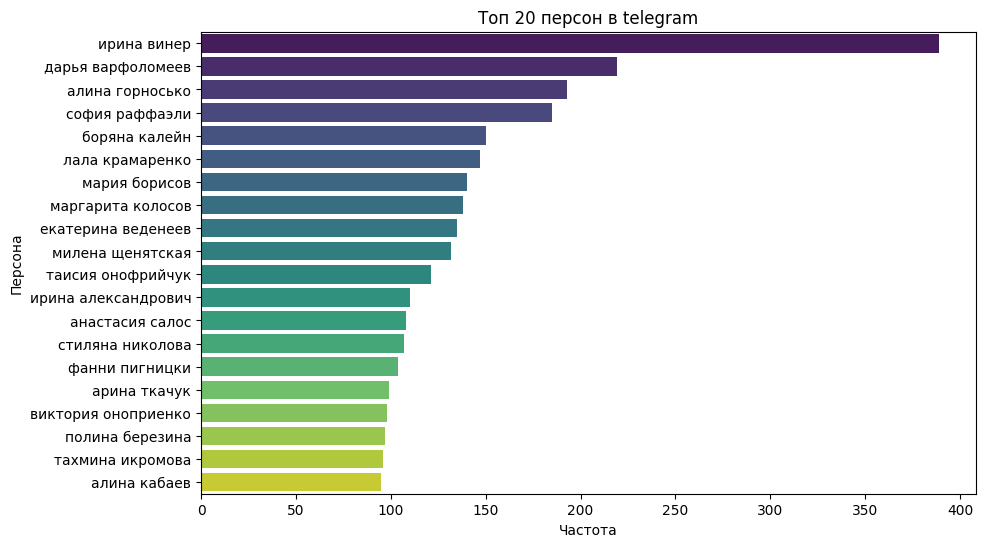

<ipython-input-82-3de867ef6dba>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keywords_counts.values, y=keywords_counts.index, palette="magma")


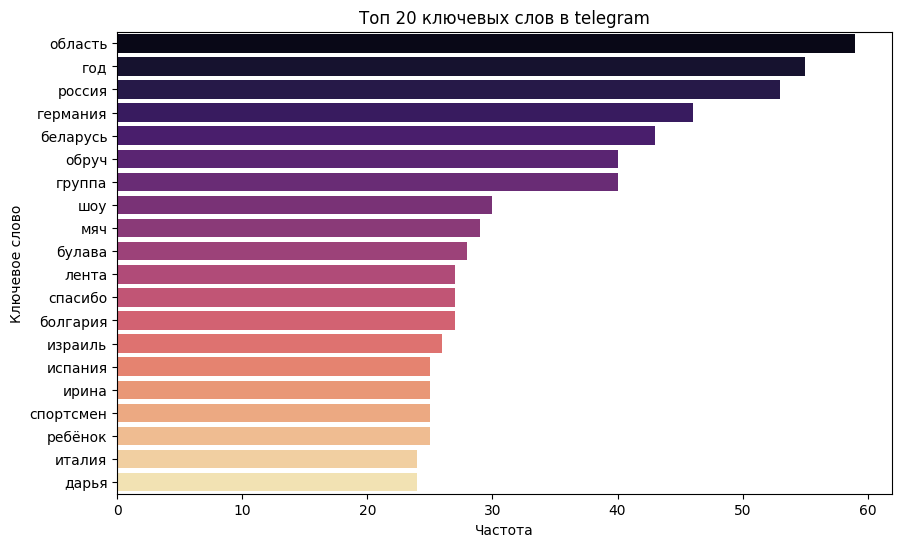

In [83]:
df_persons_telegram, df_keywords_telegram = create_summary_and_analyze(processed_df2.copy(), 'telegram')

Микровывод 1:

1. На первом месте идет Ирина Винер. Возможно, это связано с последним скандалом, который произошел совсем недавно.

2. Далее идут 4 гимнастки НЕ из Росссии. Дарья - победительница Олиспийских игр, Германия. Алина Горносько - гимнастка из Беларуси, которая активнее всех пытается участовать на международных стартах. София Раффаэли - бронзовый призер Олимпийских игр, Италья. Боряна Калейн - серебряный призер Олимпийских игр, Болгария. То есть тут видим ОГРОМНОЕ влияние на статистику Олимпийских игр.

3. Только после них идет Лала Крамаренко, которая официально еще первый номер сборной России. Ее победа на играх БРИКС не дала ей того же толчка в статистике, что и у участников Олимпийских игр.

4. Далее в основном идут другие члены сборной России

5. Также встречаются гимнастки Украины, Беларуси, Германии и Словении.

6. Почти 100 раз была упомянута Алина Кабаева


Микровывод 2:

В целом, лидируют либо страны, которые могли упоминяться в рамках Олимпийских игр, либо названия гимнастических предметов.

###Анализ данных с сайта федерации


Топ 20 персон для vrgf:
persons
ирина винер                        564
милена щенятская                   240
арина ткачук                       234
софия ильтерякова                  225
анастасия иванов                   224
ирина винер - усманов              221
арина янковский                    120
карина киреев                      118
фестиваль                          116
ольга сергеевич капранова          116
александр фролов                   114
софия ланцова                      114
дмитрий степанчикова               111
елена иванов                       111
дарья алмазов                      111
софья никольский                   111
илья сергеевич мадилов             110
екатерина борисович мисожникова    110
марина лощинин                     110
вероника шатковой                  110
Name: count, dtype: int64

Топ 20 ключевых слов для vrgf:
keywords
мастер                231
фестиваль             123
сбор                  122
спорт                 120
концерт         

<ipython-input-82-3de867ef6dba>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=persons_counts.values, y=persons_counts.index, palette="viridis")


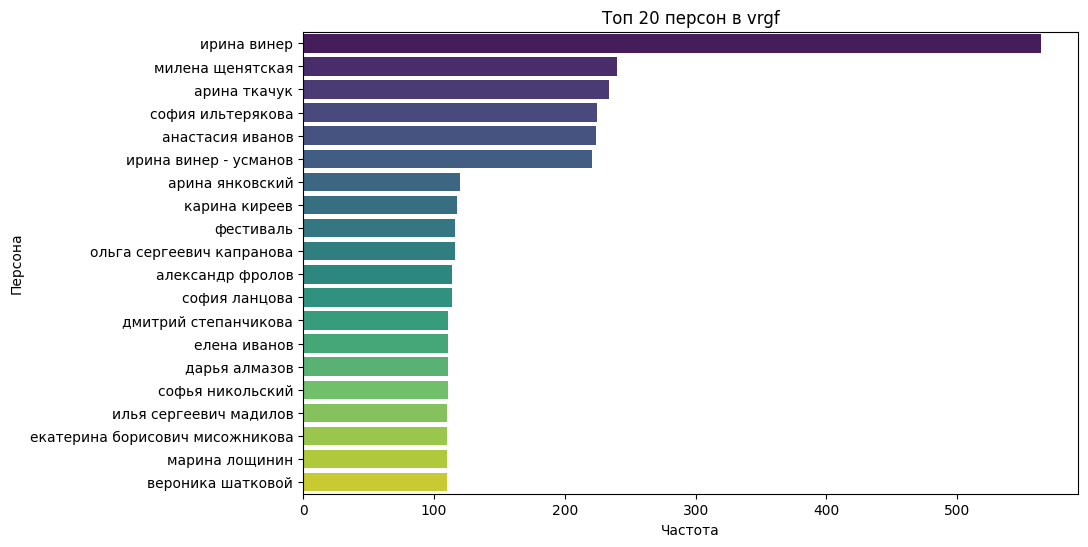

<ipython-input-82-3de867ef6dba>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keywords_counts.values, y=keywords_counts.index, palette="magma")


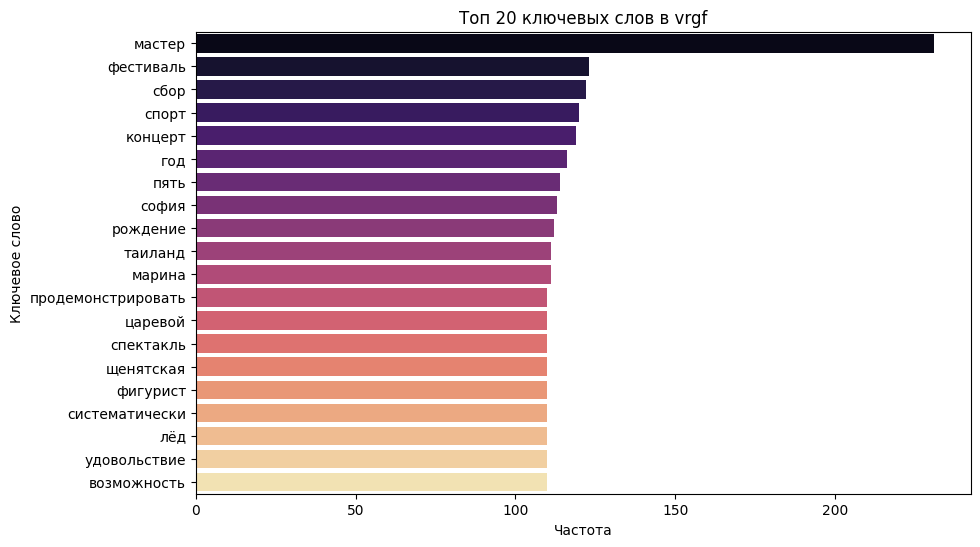

In [84]:
df_persons_vrgf, df_keywords_vrgf = create_summary_and_analyze(df_processed_df.copy(), 'vrgf')


Микровывод 1:

1. Опять полная победа Ирины Александровны Винер (если еще сложить ирина винер - усманова). Получается, практически, в каждой 5 статье она упоминается.

2. В топе отсутсвуют упоминания зарубежных спортсменок

3. На втором месте Милена Щенятская, которая сейчас находится в тройке лидеров сборной и участвует во всех соревнованиях.

4. Ольга Капранова - тренер сборной России

5. Часто упоминаются люди из администрации сборной, а не гимнастки

Микровывод 2:

1. мастер - может упоминаться в контексте "мастер спорта", кандидат мастеров спорта", "заслуженный мастер сопрта России" или  "заслуженный мастер сопрта международного класса"

2. Интересно, что сюда попало пара имен, упоминание фигурного катания (лед, фигурист)

3. Остальные слова, в целом, предсказуемы

###Сравнение двух источников

In [86]:
def compare_frequency(df1, df2, column_name, source_name1, source_name2, top_n=10):
    counts1 = df1[column_name].value_counts().head(top_n)
    counts2 = df2[column_name].value_counts().head(top_n)

    comparison_df = pd.DataFrame({
        f'{source_name1}': counts1,
        f'{source_name2}': counts2
    }).fillna(0)

    print(f"\nСравнение частотности {column_name} между {source_name1} и {source_name2} (Топ {top_n}):")
    print(comparison_df)

    comparison_df.plot(kind='bar', figsize=(12, 7))
    plt.title(f'Сравнение частотности {column_name} между {source_name1} и {source_name2}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Частота')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Сравнение частотности keywords между telegram и vrgf (Топ 10):
           telegram   vrgf
keywords                  
беларусь       43.0    0.0
булава         28.0    0.0
германия       46.0    0.0
год            55.0  116.0
группа         40.0    0.0
концерт         0.0  119.0
мастер          0.0  231.0
мяч            29.0    0.0
область        59.0    0.0
обруч          40.0    0.0
пять            0.0  114.0
рождение        0.0  112.0
россия         53.0    0.0
сбор            0.0  122.0
софия           0.0  113.0
спорт           0.0  120.0
таиланд         0.0  111.0
фестиваль       0.0  123.0
шоу            30.0    0.0


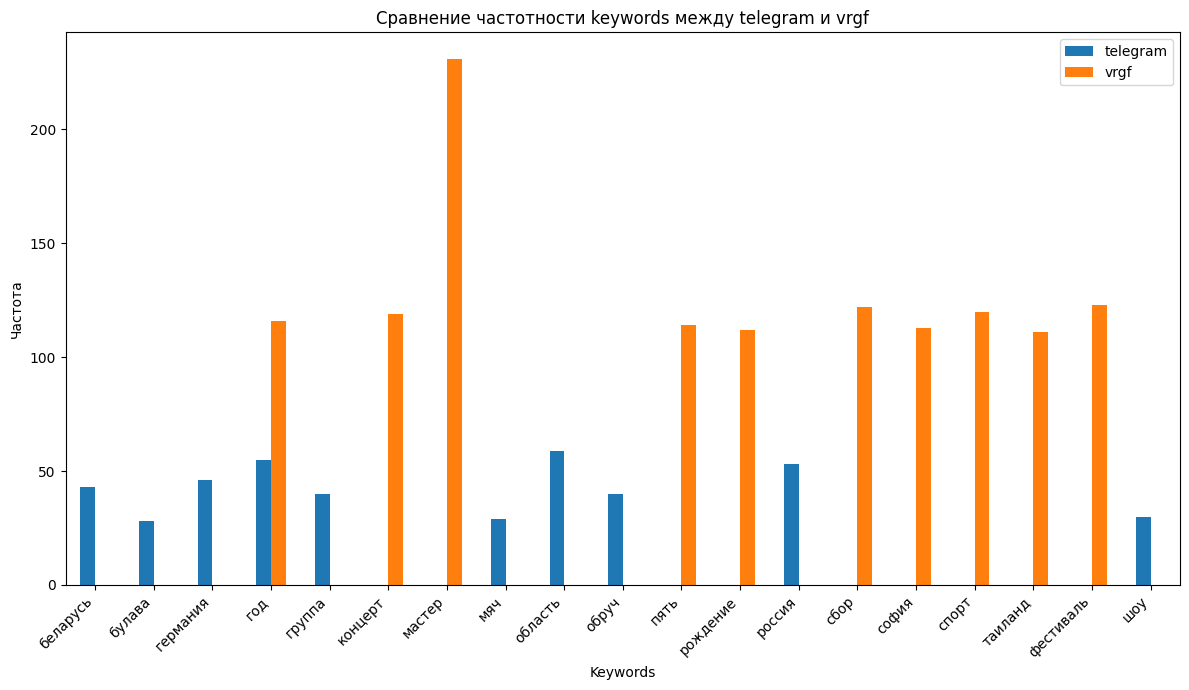


Сравнение частотности persons между telegram и vrgf (Топ 10):
                           telegram   vrgf
persons                                   
алина горносько               193.0    0.0
анастасия иванов                0.0  224.0
арина ткачук                    0.0  234.0
арина янковский                 0.0  120.0
боряна калейн                 150.0    0.0
дарья варфоломеев             219.0    0.0
екатерина веденеев            135.0    0.0
ирина винер                   389.0  564.0
ирина винер - усманов           0.0  221.0
карина киреев                   0.0  118.0
лала крамаренко               147.0    0.0
маргарита колосов             138.0    0.0
мария борисов                 140.0    0.0
милена щенятская              132.0  240.0
ольга сергеевич капранова       0.0  116.0
софия ильтерякова               0.0  225.0
софия раффаэли                185.0    0.0
фестиваль                       0.0  116.0


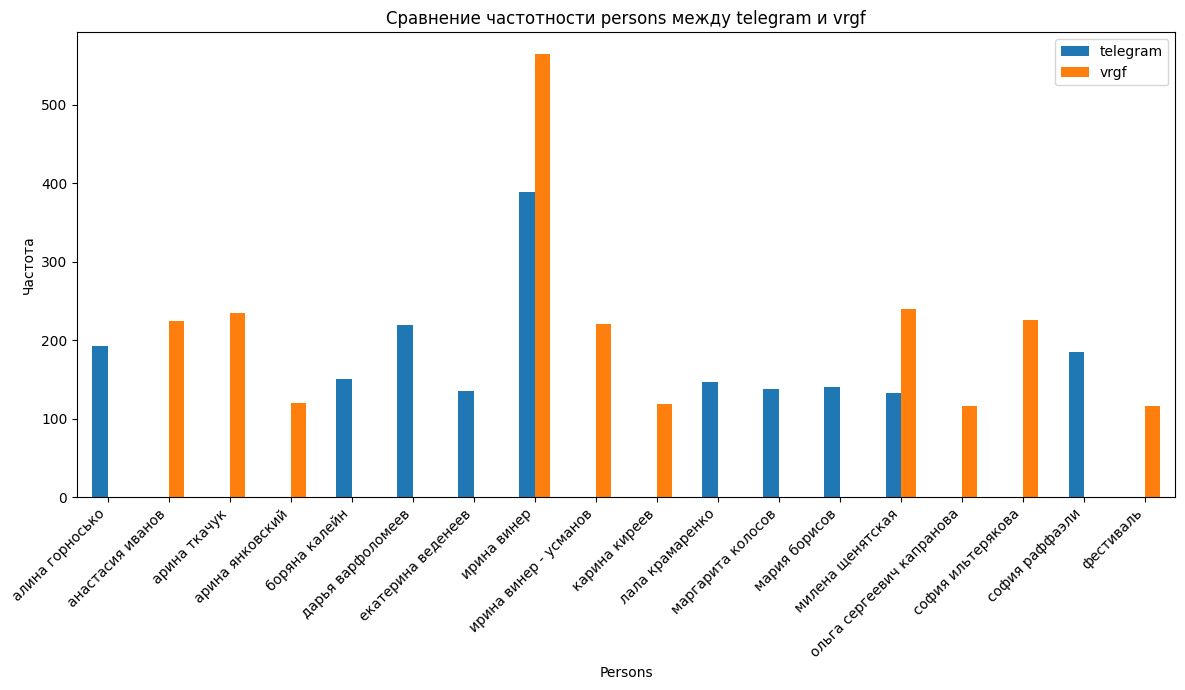

In [87]:
# Сравнение ключевых слов между telegram и vrgf
compare_frequency(df_keywords_telegram, df_keywords_vrgf, 'keywords', 'telegram', 'vrgf')

# Сравнение персон между telegram и vrgf
compare_frequency(df_persons_telegram, df_persons_vrgf, 'persons', 'telegram', 'vrgf')


Микровывод 1:

В топ10 (брала для наглядности) и в тот, и в тот список вошло слово только "год"

Микровывод 2:

В топ10 и в тот, и в тот список вошли Ирина Александровна Винер и Милена Щенятская. Я ожидала, что тут может быть Алина Кабаева, Лала Крамаренко или кто-то из топа сборной России.

#База данных

In [102]:
# объединяем в один датафрейм, чтобы на основе него сделать базу данных
concatenated_df = pd.concat([df_processed_df, processed_df2], ignore_index=True)

In [101]:
df_processed_df.info()
df_processed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3657 non-null   int64 
 1   href            3657 non-null   object
 2   title           3657 non-null   object
 3   text            3657 non-null   object
 4   source          3657 non-null   object
 5   processed_text  3657 non-null   object
 6   persons         3657 non-null   object
 7   keywords        3657 non-null   object
dtypes: int64(1), object(7)
memory usage: 228.7+ KB


,Unnamed: 0,href,title,text,source,processed_text,persons,keywords
0,0,/about/news/27yanvaryaDenpolnogoosvobozhdeniya...,27 января — День полного освобождения Ленингра...,27 января — День полного освобождения Ленингра...,vfrg,январь день полный освобождение ленинград блок...,[],"[ленинград, освобождение, блокада]"
1,1,/about/news/Polozhenieomezhregionalnykhivseros...,Положение о межрегиональных и всероссийских оф...,На сайте опубликовано Положение о межрегиональ...,vfrg,сайт опубликовать положение межрегиональный вс...,[],"[межрегиональный, опубликовать, положение]"
2,3,/about/news/Podvodyaitogi2024goda/,Подводя итоги 2024 года,Дорогие друзья! \r\n\n\r\n\tПодводя итоги этог...,vfrg,дорогой друг подводить итог насыщенный год под...,[],"[победа, самоотдача, пережить]"
3,4,/about/news/Etotgodbylosobennymvedmyotmetili90...,"Этот год был особенным, ведь мы отметили 90-ле...",Дорогие поклонники художественной гимнастики! ...,vfrg,дорогой поклонник художественный гимнастика го...,[],"[история, музыкант, незабываемый]"
4,5,/about/news/Finalnyesbory2024godaPerspektivnye...,Финальные сборы 2024 года - «Перспективные дети»,В Новогорске полным ходом идут финальные сборы...,vfrg,новогорск полный ход идти финальный сбор персп...,"[марина николаев, вероника шатковой, дмитрий с...","[марина, сбор, царевой]"


In [100]:
df_processed_df = df_processed_df.rename(columns={'full_text':'text'})

In [110]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7457 entries, 0 to 7456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7457 non-null   int64 
 1   text        7457 non-null   object
 2   source      7457 non-null   object
 3   persons     7457 non-null   object
 4   keywords    7457 non-null   object
dtypes: int64(1), object(4)
memory usage: 291.4+ KB


In [104]:
# убираем столбцы, которые были только в одном из двух датафреймов
concatenated_df = concatenated_df.drop('href', axis=1)
concatenated_df = concatenated_df.drop('title', axis=1)
concatenated_df = concatenated_df.drop('date', axis=1)
concatenated_df = concatenated_df.drop('text_entities', axis=1)
concatenated_df = concatenated_df.drop('processed_text', axis=1)

In [93]:
concatenated_df.head(10)

,Unnamed: 0,full_text,source,persons,keywords,text
0,0,27 января — День полного освобождения Ленингра...,vfrg,[],"[ленинград, освобождение, блокада]",NaN
1,1,На сайте опубликовано Положение о межрегиональ...,vfrg,[],"[межрегиональный, опубликовать, положение]",NaN
2,3,Дорогие друзья! \r\n\n\r\n\tПодводя итоги этог...,vfrg,[],"[победа, самоотдача, пережить]",NaN
3,4,Дорогие поклонники художественной гимнастики! ...,vfrg,[],"[история, музыкант, незабываемый]",NaN
4,5,В Новогорске полным ходом идут финальные сборы...,vfrg,"[марина николаев, вероника шатковой, дмитрий с...","[марина, сбор, царевой]",NaN
5,6,"Как же приятно видеть, как сияют глаза наших д...",vfrg,[],"[девочка, щелкунчик, волшебство]",NaN
6,7,4-12 января 2025 года - наши волшебные зимние ...,vfrg,[],"[зимний, сбор, каникул]",NaN
7,8,Во дворце художественной гимнастики «Татьяна А...,vfrg,"[софия ильтерякова, анастасия иванов, елизавет...","[рождение, год, мастер]",NaN
8,9,Сегодня мы отмечаем День Конституции Российско...,vfrg,[],"[вдохновлять, конституция, закон]",NaN
9,10,7 декабря в Минске состоялся масштабный гала-к...,vfrg,"[антонина кузнецов, елена иванов, милена щенят...","[стремление, концерт, глубокий]",NaN


In [124]:
conn = sqlite3.connect('articles.db')
cur = conn.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS articles (
    article_id INTEGER PRIMARY KEY AUTOINCREMENT,
    text TEXT NOT NULL
)
""")

# Создание таблицы source
cur.execute("""
CREATE TABLE IF NOT EXISTS source (
    source_id INTEGER PRIMARY KEY AUTOINCREMENT,
    source TEXT NOT NULL UNIQUE
)
""")
cur.execute("INSERT OR IGNORE INTO source (source_id, source) VALUES (0, 'telegram')")
cur.execute("INSERT OR IGNORE INTO source (source_id, source) VALUES (1, 'vfrg')")

# Создание таблицы source_article (связь статей с источниками)
cur.execute("""
CREATE TABLE IF NOT EXISTS source_article (
    article_id INTEGER,
    source_id INTEGER,
    FOREIGN KEY (article_id) REFERENCES articles (article_id),
    FOREIGN KEY (source_id) REFERENCES source (source_id),
    PRIMARY KEY (article_id, source_id)
)
""")

# Создание таблицы keywords
cur.execute("""
CREATE TABLE IF NOT EXISTS keywords (
    keyword_id INTEGER PRIMARY KEY AUTOINCREMENT,
    keyword TEXT NOT NULL UNIQUE
)
""")

# Создание таблицы persons
cur.execute("""
CREATE TABLE IF NOT EXISTS persons (
    person_id INTEGER PRIMARY KEY AUTOINCREMENT,
    person TEXT NOT NULL UNIQUE
)
""")

# Создание таблицы nlp_article (связь статей с людьми и ключевыми словами)
cur.execute("""
CREATE TABLE IF NOT EXISTS article_nlp (
    article_id INTEGER,
    person_id INTEGER,
    keyword_id INTEGER,
    FOREIGN KEY (article_id) REFERENCES articles (article_id),
    FOREIGN KEY (person_id) REFERENCES persons (person_id),
    FOREIGN KEY (keyword_id) REFERENCES keywords (keyword_id),
    PRIMARY KEY (article_id, person_id, keyword_id)
)
""")


In [125]:
def insert_article_with_source(text, source_name): # функция, чтобы у каждого article_id было значение 0/1 source_id
    # Вставка статьи
    cur.execute("INSERT INTO articles (text) VALUES (?)", (text,))
    article_id = cur.lastrowid

    # Получаем source_id по имени источника (telegram или vfrg)
    cur.execute("SELECT source_id FROM source WHERE source = ?", (source_name,))
    source_id = cur.fetchone()[0]

    cur.execute("""
    INSERT INTO source_article (article_id, source_id)
    VALUES (?, ?)
    """, (article_id, source_id))

    return article_id

In [126]:
for idx, row in concatenated_df.iterrows():
    # Вставка или получение source
    cur.execute("""
    INSERT OR IGNORE INTO source (source) VALUES (?)
    """, (row['source'],))

    # Получаем source_id по имени источника (telegram или vfrg)
    cur.execute("SELECT source_id FROM source WHERE source = ?", (row['source'],))
    source_id = cur.fetchone()[0]

    article_id = insert_article_with_source(row['text'], row['source'])

    # Обработка и связь ключевых слов с article_id
    for keyword in row['keywords']:
        cur.execute("""
        INSERT OR IGNORE INTO keywords (keyword) VALUES (?)
        """, (keyword,))
        keyword_id = cur.lastrowid


        cur.execute("""
        INSERT INTO article_nlp (article_id, keyword_id) VALUES (?, ?)
        """, (article_id, keyword_id))

    # Обработка и связь persons с article_id
    for person in row['persons']:
        if person:
            cur.execute("""
            INSERT OR IGNORE INTO persons (person) VALUES (?)
            """, (person,))
            person_id = cur.lastrowid

            cur.execute("""
            INSERT INTO article_nlp (article_id, person_id) VALUES (?, ?)
            """, (article_id, person_id))


conn.commit()
conn.close()